<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
import matplotlib.pyplot as plt

import json
import numpy as np
import sys
sys.path.append('../code')

import torch
from model import SimpleCNN

In [4]:
target = 'mnist'
methods = ['IB','DeconvNet','IG','GB','GC']
ratio_lst = np.arange(0, 1, 0.1)[1:]
eval_method = 'ROAR'

In [5]:
# mnist
mnist_simplecnn = torch.load('../checkpoint/simple_cnn_mnist.pth')
mnist_model = SimpleCNN('mnist')
mnist_model.load_state_dict(mnist_simplecnn['model'])

# cifar10
cifar10_simplecnn = torch.load('../checkpoint/simple_cnn_cifar10.pth')
cifar10_model = SimpleCNN('cifar10')
cifar10_model.load_state_dict(cifar10_simplecnn['model'])

Model Complete
Model Complete


<All keys matched successfully>

In [6]:
test_acc = {m: [] for m in methods}

for m in methods:
    f = open('../logs/simple_cnn_{}_logs.txt'.format(target), 'r')
    test_acc[m].append(json.load(f)['test_result'])

for m in methods:
    for ratio in ratio_lst:
        f = open('../logs/simple_cnn_{0:}_{1:}_{2:}{3:.1f}_logs.txt'.format(target, m, eval_method, ratio),'r')
        test_acc[m].append(json.load(f)['test_result'])

Text(0.5, 0, '# of remove ratio')

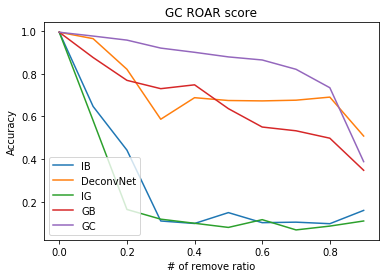

In [9]:
for m in methods:
    plt.plot(np.arange(0, 1, 0.1), test_acc[m], label=m)
    plt.title(f'{m} ROAR score')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('# of remove ratio')